# Proyecto Algrebra lineal
## Nombre: Luis Felipe Castro Calderón

¿Cómo afecta el aumento de los tipos de tasas de interes de la FED el precio del índice bursatíl S&P 500?

Fuentes:

## Historico tipos de tasas 
https://es.investing.com/indices/fed-funds-composite-interest-rate-historical-data

## Historico precios S&P 500
https://es.finance.yahoo.com/quote/%5EGSPC/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAAmC-mIsBli6r9yeKquLWU0RXsuCBcbbqzg5zTY511aDVjPaaFpydR2Y4_UrqfZ_sNTDjBTHSkXCL2IJneWHgp6OWkzWMUJ_jDIdEwqDuL_hSQhBLkOs__lVB8P-cnWaMb4zs79XWfVnoygsMvDKGlCpqwecFZk79IotEJ9zrCne


1. Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Leer archivo csv

In [18]:
data = pd.read_csv("/content/Regresion.csv",index_col=None,sep=";")
data.head(5)

,Fecha,Tipo de interes FED (X),Precio S&P 500 (Y)
0,1/10/2022,"3,08","3639,66"
1,1/09/2022,"3,08","3585,62"
2,1/08/2022,"2,33",3955
3,1/07/2022,"2,32","4130,29"
4,1/06/2022,"1,58","3785,38"


2. Renombrar columnas

In [24]:
data.columns = ["Fecha","X","Y"]

3. Crear listas con X y Y

In [40]:
x = data["X"].tolist() #Creo lista
x = [i.replace(",",".") for i in x] #Reemplazo "," por "." en la lista
x = [float(i) for i in x] #Convierto todos los valores de la lista en float



In [46]:
y = data["Y"].tolist()
y = [i.replace(",",".") for i in y] #Reemplazo "," por "." en la lista
y = [float(i) for i in y] #Convierto todos los valores de la lista en float

3. Determinar la cantidad de datos para X y Y

In [48]:
n = len(y) # X y Y tienen que tener la misma cantidad de datos
n

34

4. Convertimos en arrays a X y Y (Esto porque en python las listas no se pueden multiplicar como los arrays elemento por elemento) y sacamos los siguientes valores:

In [51]:
x = np.array(x)
y = np.array(y)
sumx = sum(x)
sumy = sum(y)
sumx2 = sum(x*x)
sumy2 = sum(y*y)
sumxy = sum(x*y)
promx = sumx/n
promy = sumy/n

In [52]:
m = (sumx*sumy - n*sumxy) / (sumx**2 - n*sumx2) #b1
b = promy - m*promx #bo
m,b 

(-88.02398329905589, 3893.6273790006544)

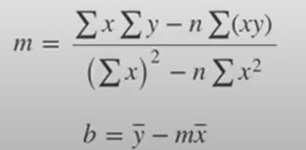

5. Gráficamos nuestra regresión

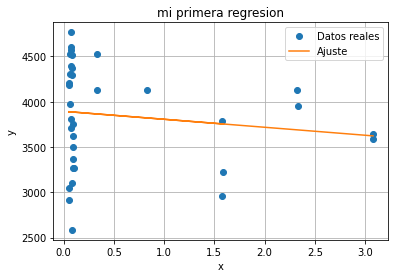

In [56]:
plt.plot(x,y,"o", label="Datos reales")
plt.plot(x,m*x+b, label="Ajuste")
plt.xlabel("x")
plt.ylabel("y")
plt.title("mi primera regresion")
plt.grid() #mostrar regillas
plt.legend() #mostrar labels
plt.show()


6. Verificamos R2

In [57]:
sigmax = np.sqrt(sumx2/n - promx**2)
sigmay = np.sqrt(sumy2/n - promy**2)
sigmaxy = sumxy/n - promx*promy
R2 =  (sigmaxy/(sigmax*sigmay))**2
R2

0.019911311097801504

7. Interpretamos nuestro modelo:

Un valor de 1,0 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras, mientras que un valor de 0,0 indicaría que el cálculo no logra modelar los datos con precisión en absoluto. Pero un valor de 0,20, por ejemplo, sugiere que el 20% de la variable dependiente es predicha por la variable independiente, mientras que un valor de 0,50 sugiere que el 50% de la variable dependiente es predicha por la variable independiente, y así sucesivamente.

**las variables pueden tener problemas de relación segun su los factores de estar o no insesgadas o ser o no eficientes:**

- Un estimador insesgado es aquel cuya esperanza matemática coincide con el valor del parámetro que se desea estimar
- Un estimador eficiente nos indica que la varianza(e) = 0. Es decir, entre mas conflicto tengas las dos variables según nuestra esperanza pues la efiencia disminuirá.

## Conclusión: Los tipos de tasas de interes no han tenido una relación directa que impacte el precio del S&P 500 desde enero 1 del año 2020 hasta 1 de octubre del año 2022